<a href="https://colab.research.google.com/github/osfecasu025/Drogueria-web/blob/main/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

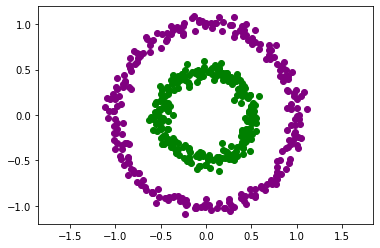

In [11]:
# Crear DATASET
n= 500
p=2
X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y= Y[:, np.newaxis]


plt.scatter (X[Y[:, 0] == 0 ,0], X[Y[:, 0]==0, 1], c="PURPLE")
plt.scatter (X[Y[:, 0]==1 ,0], X[Y[:, 0]==1, 1], c="GREEN")
plt.axis("equal")
plt.show()

In [27]:
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
      self.act_f = act_f
      self.b = np.random.rand(1, n_neur) * 2 - 1
      self.w = np.random.rand(n_conn, n_neur) * 2 - 1

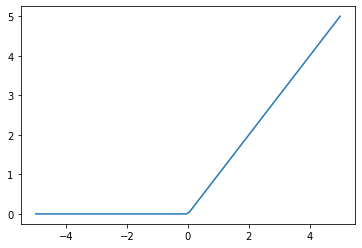

In [19]:
#FUNCIONES DE ACTIVACION
sigm = (lambda x:1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu= lambda x: np.maximum(0,x)

_x = np.linspace(-5, 5, 100)

plt.plot(_x , relu(_x))


In [29]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)

def create_nn(topology, act_f):

  nn = []
  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn




In [70]:
topology = [p, 4, 8, 16, 8, 4, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))
 
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]
  #Forward pass
  for l, layer in enumerate(neural_net):
 
    z = out[-1][1] @ neural_net[l].w + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    #Backward pass
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      print(a.shape)
      
      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a,Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _w.T * neural_net[l].act_f[1](a))

      _w = neural_net[l].w
    
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0] * lr

  return out[-1][1]
      
train(neural_net, X, Y, l2_cost, 0.5)



0.2582905300513474
(500, 1)
(500, 4)


ValueError: ignored